In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.
# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

zhicheng cn
bandarbeyla so
lagoa pt
taolanaro mg
ilulissat gl
adrar dz
kapaa us
atuona pf
naldurg in
punta arenas cl
gamba ga
gamba ga
severodvinsk ru
xining cn
castro cl
atuona pf
lagoa pt
bubaque gw
lorengau pg
srivardhan in
upernavik gl
busselton au
ancud cl
mahebourg mu
fortuna us
chardara kz
wajima jp
punta arenas cl
taolanaro mg
nizhneyansk ru
port alfred za
busselton au
thompson ca
mataura pf
severo-kurilsk ru
mar del plata ar
dikson ru
igarka ru
bluff nz
rikitea pf
albany au
batemans bay au
alugan ph
lavrentiya ru
arlit ne
vaini to
cape town za
lahan np
hermanus za
ushuaia ar
deh rawud af
lagoa pt
tasiilaq gl
east london za
cape town za
gijon es
yamada jp
rikitea pf
longlac ca
busselton au
cherskiy ru
vaini to
hilo us
bredasdorp za
attawapiskat ca
kodiak us
hihifo to
goderich sl
jamestown sh
kruisfontein za
punta arenas cl
airai pw
asau tv
rikitea pf
ushuaia ar
puerto ayora ec
codrington ag
broken hill au
carnarvon au
georgetown sh
georgetown sh
kaeo nz
cape town za
umzimvubu z

arraial do cabo br
srandakan id
saskylakh ru
saint-pierre pm
gewane et
khatanga ru
dikson ru
ushuaia ar
saldanha za
yellowknife ca
puerto ayora ec
champerico gt
coihaique cl
punta arenas cl
albany au
busselton au
kruisfontein za
qaanaaq gl
port elizabeth za
la ronge ca
kavieng pg
albany au
kavieng pg
kinango ke
jamestown sh
katherine au
le vauclin mq
sitka us
samalaeulu ws
butaritari ki
port alfred za
kapaa us
santa maria cv
ojinaga mx
cape town za
busselton au
hyeres fr
khani ru
dingle ie
chicama pe
belushya guba ru
ushuaia ar
tiksi ru
ushuaia ar
souillac mu
bredasdorp za
cape town za
thompson ca
albany au
barentsburg sj
dingle ie
kaitangata nz
umzimvubu za
rikitea pf
nantucket us
saskylakh ru
banswara in
hilo us
ayan ru
naze jp
tasiilaq gl
buraydah sa
belushya guba ru
mizpe ramon il
barentsburg sj
kargasok ru
mataura pf
rikitea pf
kaduna ng
illoqqortoormiut gl
hilo us
fairbanks us
port macquarie au
bonavista ca
taolanaro mg
honningsvag no
clyde river ca
chuy uy
jacksonville us
saryag

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import OpenWeather_API_KEY

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + OpenWeather_API_KEY
# print(url)

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Next, we need to iterate through our list of cities and begin building the URL for each city, 
# while grouping our records in sets of 50. 
# To do this, use for i in range(len(cities)) and the index to tell us when we get to 50. 
# Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command. 
# The OpenWeatherMap API only allows 60 calls for per minute on their free tier, 
# so pausing our program for one minute after each set of 50 will prevent time-out errors. 
# We can also retrieve the city from the cities list and add it to the city_url by using indexing, 
# as shown in the following code:

In [14]:
# We create the for loop with the enumerate() method and reference the index and the city in the list.
# In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. 
# If the statement is true, then the set_count and the record_count are incremented by 1.
# Inside the conditional statement, we create the URL endpoint for each city, as before. 
# However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). 
# This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
# Then we add one to the record count before the next city is processed.

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhicheng
Processing Record 2 of Set 1 | bandarbeyla
Processing Record 3 of Set 1 | lagoa
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | adrar
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | naldurg
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | gamba
Processing Record 12 of Set 1 | severodvinsk
Processing Record 13 of Set 1 | xining
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | bubaque
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | srivardhan
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | fortuna
Processing Record 23 of S

Processing Record 32 of Set 4 | luderitz
Processing Record 33 of Set 4 | port elizabeth
Processing Record 34 of Set 4 | boguchany
Processing Record 35 of Set 4 | houma
Processing Record 36 of Set 4 | uige
Processing Record 37 of Set 4 | patharia
Processing Record 38 of Set 4 | vrangel
Processing Record 39 of Set 4 | capreol
Processing Record 40 of Set 4 | leh
Processing Record 41 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | trelleborg
Processing Record 44 of Set 4 | marawi
Processing Record 45 of Set 4 | saldanha
Processing Record 46 of Set 4 | yellowknife
Processing Record 47 of Set 4 | grindavik
Processing Record 48 of Set 4 | caravelas
Processing Record 49 of Set 4 | bethel
Processing Record 50 of Set 4 | saint-leu
Processing Record 1 of Set 5 | baykit
Processing Record 2 of Set 5 | paita
Processing Record 3 of Set 5 | taupo
Processing Record 4 of Set 5 | constitucion
Processing Record 5 of Set 5 | barr

Processing Record 25 of Set 8 | katherine
Processing Record 26 of Set 8 | le vauclin
Processing Record 27 of Set 8 | sitka
Processing Record 28 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 29 of Set 8 | santa maria
Processing Record 30 of Set 8 | ojinaga
Processing Record 31 of Set 8 | hyeres
Processing Record 32 of Set 8 | khani
Processing Record 33 of Set 8 | chicama
Processing Record 34 of Set 8 | banswara
Processing Record 35 of Set 8 | kargasok
Processing Record 36 of Set 8 | kaduna
Processing Record 37 of Set 8 | port macquarie
Processing Record 38 of Set 8 | bonavista
Processing Record 39 of Set 8 | honningsvag
Processing Record 40 of Set 8 | jacksonville
Processing Record 41 of Set 8 | saryagash
Processing Record 42 of Set 8 | riom
Processing Record 43 of Set 8 | poltavskaya
Processing Record 44 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 45 of Set 8 | mbala
Processing Record 46 of Set 8 | narsaq
Processing Record 47 of Set 8 | rus

Processing Record 14 of Set 12 | walvis bay
Processing Record 15 of Set 12 | maine-soroa
Processing Record 16 of Set 12 | maldonado
Processing Record 17 of Set 12 | tres lagoas
Processing Record 18 of Set 12 | domodossola
Processing Record 19 of Set 12 | sarahan
Processing Record 20 of Set 12 | phan thiet
Processing Record 21 of Set 12 | santa cruz
Processing Record 22 of Set 12 | itaituba
Processing Record 23 of Set 12 | kirovskiy
Processing Record 24 of Set 12 | rebrikha
Processing Record 25 of Set 12 | baoding
Processing Record 26 of Set 12 | ozernovskiy
Processing Record 27 of Set 12 | ulladulla
Processing Record 28 of Set 12 | ankang
Processing Record 29 of Set 12 | nivala
Processing Record 30 of Set 12 | omboue
Processing Record 31 of Set 12 | skibbereen
Processing Record 32 of Set 12 | grand gaube
Processing Record 33 of Set 12 | albury
Processing Record 34 of Set 12 | waitati
Processing Record 35 of Set 12 | rosetown
Processing Record 36 of Set 12 | huilong
Processing Record 37

In [ ]:
# # Run an API request for each of the cities.
# try:
    
#         # Parse the JSON and retrieve data.
#     city_weather = requests.get(city_url).json()
#         # Parse out the needed data.
#     city_lat = city_weather["coord"]["lat"]
#     city_lng = city_weather["coord"]["lon"]
#     city_max_temp = city_weather["main"]["temp_max"]
#     city_humidity = city_weather["main"]["humidity"]
#     city_clouds = city_weather["clouds"]["all"]
#     city_wind = city_weather["wind"]["speed"]
#     city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#     city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#     city_data.append({"City": city.title(),
#                     "Lat": city_lat,
#                     "Lng": city_lng,
#                     "Max Temp": city_max_temp,
#                     "Humidity": city_humidity,
#                     "Cloudiness": city_clouds,
#                     "Wind Speed": city_wind,
#                     "Country": city_country,
#                     "Date": city_date})

# # If an error is experienced, skip the city.
# except:
#     print("City not found. Skipping...")
# pass

# # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [16]:
len(city_data)

565

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhicheng,30.2956,111.5047,41.59,58,100,6.02,CN,2022-02-02 02:46:33
1,Bandarbeyla,9.4942,50.8122,74.75,77,13,15.35,SO,2022-02-02 02:45:17
2,Lagoa,39.0500,-27.9833,58.93,72,11,14.27,PT,2022-02-02 02:42:48
3,Ilulissat,69.2167,-51.1000,3.22,51,100,6.91,GL,2022-02-02 02:46:34
4,Adrar,20.5022,-10.0711,67.19,20,62,11.21,MR,2022-02-02 02:46:34
5,Kapaa,22.0752,-159.3190,79.12,67,0,1.01,US,2022-02-02 02:46:35
6,Atuona,-9.8000,-139.0333,78.80,74,7,17.69,PF,2022-02-02 02:42:30
7,Naldurg,17.8167,76.3000,71.96,26,1,6.49,IN,2022-02-02 02:46:35
8,Punta Arenas,-53.1500,-70.9167,46.51,61,40,24.16,CL,2022-02-02 02:46:36
9,Gamba,-2.6500,10.0000,77.54,88,100,4.59,GA,2022-02-02 02:46:36


In [32]:
test_city_df = city_data_df
test_city_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhicheng,30.2956,111.5047,41.59,58,100,6.02,CN,2022-02-02 02:46:33
1,Bandarbeyla,9.4942,50.8122,74.75,77,13,15.35,SO,2022-02-02 02:45:17
2,Lagoa,39.0500,-27.9833,58.93,72,11,14.27,PT,2022-02-02 02:42:48
3,Ilulissat,69.2167,-51.1000,3.22,51,100,6.91,GL,2022-02-02 02:46:34
4,Adrar,20.5022,-10.0711,67.19,20,62,11.21,MR,2022-02-02 02:46:34
5,Kapaa,22.0752,-159.3190,79.12,67,0,1.01,US,2022-02-02 02:46:35
6,Atuona,-9.8000,-139.0333,78.80,74,7,17.69,PF,2022-02-02 02:42:30
7,Naldurg,17.8167,76.3000,71.96,26,1,6.49,IN,2022-02-02 02:46:35
8,Punta Arenas,-53.1500,-70.9167,46.51,61,40,24.16,CL,2022-02-02 02:46:36
9,Gamba,-2.6500,10.0000,77.54,88,100,4.59,GA,2022-02-02 02:46:36


In [33]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhicheng,CN,2022-02-02 02:46:33,30.2956,111.5047,41.59,58,100,6.02
1,Bandarbeyla,SO,2022-02-02 02:45:17,9.4942,50.8122,74.75,77,13,15.35
2,Lagoa,PT,2022-02-02 02:42:48,39.0500,-27.9833,58.93,72,11,14.27
3,Ilulissat,GL,2022-02-02 02:46:34,69.2167,-51.1000,3.22,51,100,6.91
4,Adrar,MR,2022-02-02 02:46:34,20.5022,-10.0711,67.19,20,62,11.21
5,Kapaa,US,2022-02-02 02:46:35,22.0752,-159.3190,79.12,67,0,1.01
6,Atuona,PF,2022-02-02 02:42:30,-9.8000,-139.0333,78.80,74,7,17.69
7,Naldurg,IN,2022-02-02 02:46:35,17.8167,76.3000,71.96,26,1,6.49
8,Punta Arenas,CL,2022-02-02 02:46:36,-53.1500,-70.9167,46.51,61,40,24.16
9,Gamba,GA,2022-02-02 02:46:36,-2.6500,10.0000,77.54,88,100,4.59


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

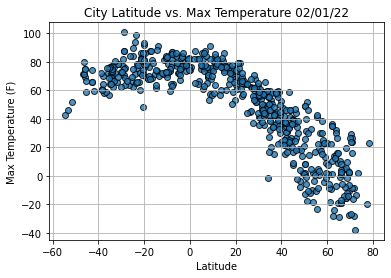

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

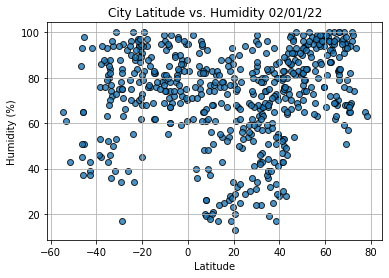

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

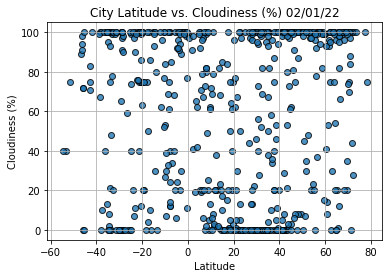

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

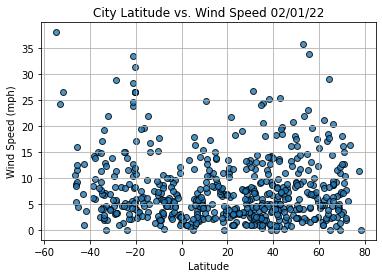

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [40]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
index13 = city_data_df.loc[13]
index13

City                      Bubaque
Country                        GW
Date          2022-02-02 02:46:38
Lat                       11.2833
Lng                      -15.8333
Max Temp                    77.81
Humidity                       77
Cloudiness                      2
Wind Speed                   4.18
Name: 13, dtype: object

In [42]:
city_data_df["Lat"] >= 0

0      True
1      True
2      True
3      True
4      True
       ... 
560    True
561    True
562    True
563    True
564    True
Name: Lat, Length: 565, dtype: bool

In [51]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhicheng,CN,2022-02-02 02:46:33,30.2956,111.5047,41.59,58,100,6.02
1,Bandarbeyla,SO,2022-02-02 02:45:17,9.4942,50.8122,74.75,77,13,15.35
2,Lagoa,PT,2022-02-02 02:42:48,39.0500,-27.9833,58.93,72,11,14.27
3,Ilulissat,GL,2022-02-02 02:46:34,69.2167,-51.1000,3.22,51,100,6.91
4,Adrar,MR,2022-02-02 02:46:34,20.5022,-10.0711,67.19,20,62,11.21
...,...,...,...,...,...,...,...,...,...
560,Along,IN,2022-02-02 03:02:25,28.1667,94.7667,53.37,92,100,0.96
561,Lieksa,FI,2022-02-02 03:02:26,63.3167,30.0167,12.38,91,100,6.31
562,Nome,US,2022-02-02 03:02:26,64.5011,-165.4064,16.16,63,0,17.72
563,Elko,US,2022-02-02 03:00:10,41.0002,-115.5012,21.74,52,5,4.00


In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

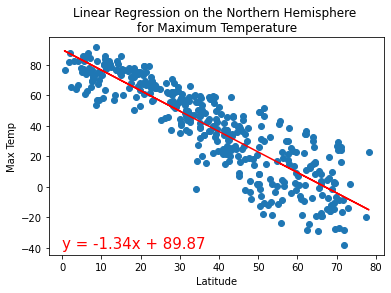

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(0,-40))

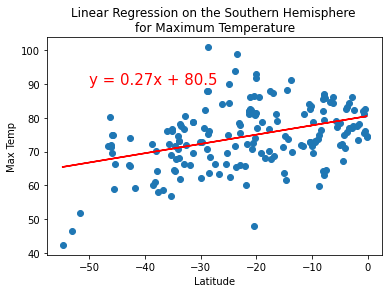

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

In [65]:
# This means that as we approach the equator, 0 lattitude, the temperatures be becomes warmer. 
# When we are further from the equator the temperatures become cooler.

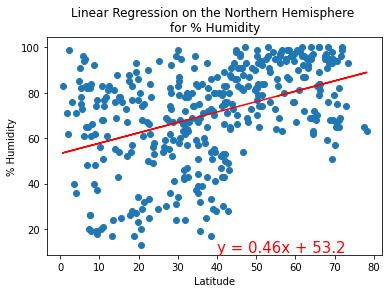

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

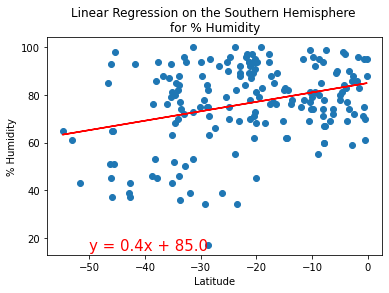

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

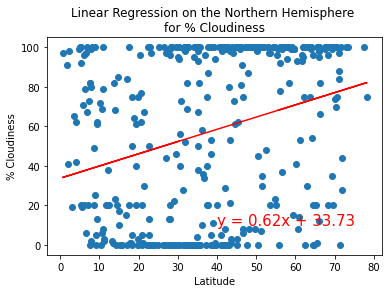

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

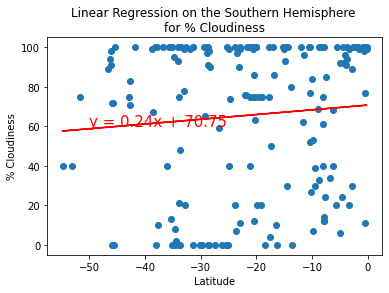

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

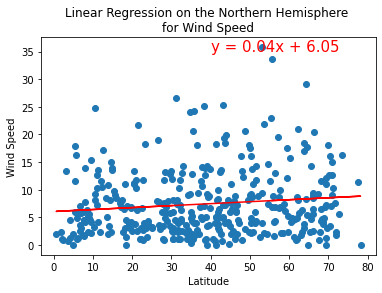

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

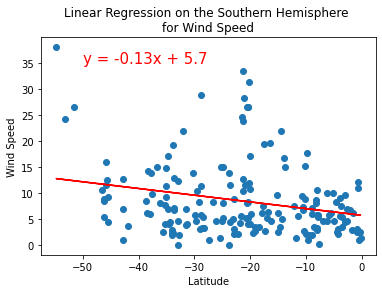

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))